In [1]:
cd ../

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob

In [3]:
# specify path to the spectrum
spec_path = "G2_dwarf/G2_+0.0_Dwarf.csv"

# object name (or abbreviation)
n = "G2_dwarf"

In [7]:
spec = pd.read_csv(spec_path, delimiter=' ', names=["wavelength","flux"])

,wavelength,flux
0,3650.049561,1.114537
1,3650.109863,1.114537
2,3650.171875,1.114537
3,3650.231934,1.105282
4,3650.292236,1.096027
...,...,...
61613,10199.195312,0.668002
61614,10199.363281,0.668370
61615,10199.541992,0.668370
61616,10199.709961,0.668370


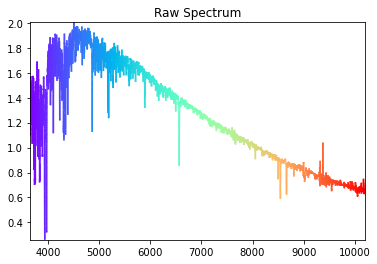

In [9]:
#raw data
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x,y = spec['wavelength'], spec['flux']
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x.min(), x.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x)
ax.add_collection(lc)
ax.set_title('Raw Spectrum')
plt.show()

In [18]:
preproc_spec = spectra_preproc(spec, bins=np.arange(3690,10000,20))

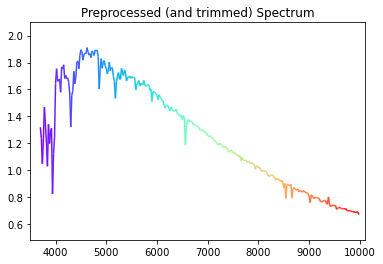

In [19]:
#preprocessed
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x,y = preproc_spec['Wavelength'], preproc_spec['Flux']
ax.set_xlim(3500, 10100)
ax.set_ylim(np.nanmin(y)-0.5*np.nanstd(y), np.nanmax(y)+0.5*np.nanstd(y))
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x.min(), x.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x)
ax.add_collection(lc)
ax.set_title('Preprocessed (and trimmed) Spectrum')
plt.show()

In [20]:
len(preproc_spec) / 8.5

37.05882352941177

In [21]:
#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

In [22]:
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)